## Merge - Join

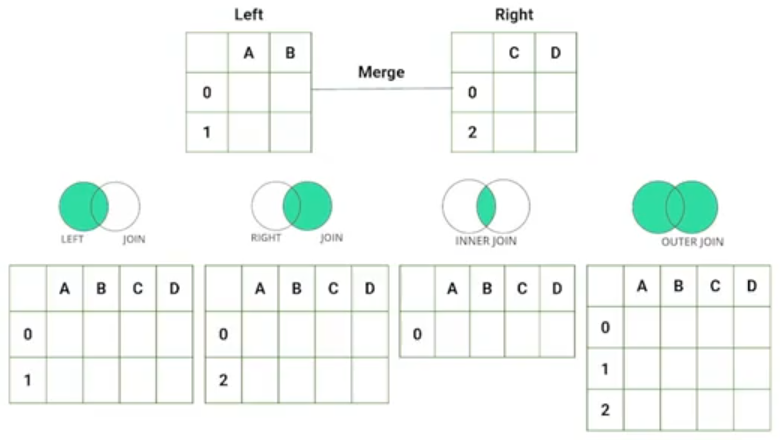

- Prioridad al dataframe izquierdo
- Prioridad al dataframe derecho
- Inner join. Solo los datos que comparten los dataframas
- Outer join. Todos los datos

## Concat
La función .concat() combina los dataframes según el axis
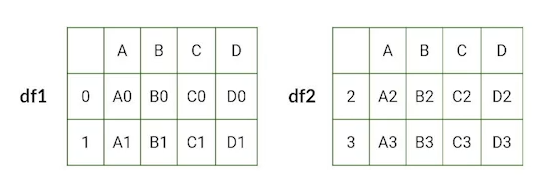

### El axis 0 combina los datos añadiendo filas
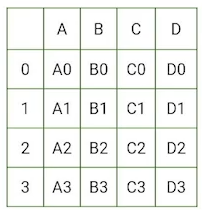


### El axis 1 combina los datos añadiendo columnas y datos nulos
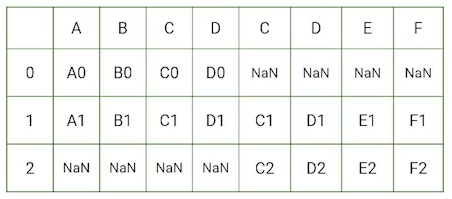

In [29]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})
df_2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A6'],
'B': ['B4', 'B5', 'B6', 'B6'],
'C': ['C4', 'C5', 'C6', 'C6'],
'D': ['D4', 'D5', 'D6', 'D6']})

### .concat()
Por defecto los dataframes se juntan por columnas
- ignore_index=True continúa los índices según el orden del primer dataframe

In [4]:
pd.concat([df_1, df_2], ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A6,B6,C6,D6


No es habitual juntar dataframes por columnas pero la opción axis lo permite

In [5]:
pd.concat([df_1, df_2], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A6,B6,C6,D6


### .merge()
Si no se especifica el label de una columna, los dataframes se unen en orden de izquierda a derecha juntando los datos de las columnas iguales


In [24]:
df_izq = pd.DataFrame({'key': ['k0', 'k1', 'k2', 'k3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
df_der = pd.DataFrame({'key2': ['k0', 'k1', 'k2', 'k3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [16]:
df_izq.merge(df_der)

,A,key,B,C,D
0,A0,k0,B0,C0,D0
1,A1,k1,B1,C1,D1
2,A2,k2,B2,C2,D2
3,A3,k3,B3,C3,D3


Si se tienen columnas con distinto nombre se tiene que especificar una columna principal por cada dataframe

In [27]:
df_izq.merge(df_der, left_on='key', right_on='key2')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,k3,C3,D3


Si hay un valor nulo en la columna key, merge no trae los valores al nuevo dataframe

In [38]:
df_izq = pd.DataFrame({'key': ['k0', 'k1', 'k2', 'k3'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})
df_der = pd.DataFrame({'key2': ['k0', 'k1', 'k2', np.nan],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [36]:
df_der

,key2,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,NaN,D2
3,k3,C3,D3


In [39]:
df_izq.merge(df_der, left_on='key', right_on='key2')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


In [40]:
df_izq.merge(df_der, left_on='key', right_on='key2')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


Para dar prioridad a un dataframe se usa:
- how='left'
- how='inner' elimina las filas nulas
- how='right'

In [41]:
df_izq.merge(df_der, left_on='key', right_on='key2', how='left')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN


In [44]:
df_izq.merge(df_der, left_on='key', right_on='key2', how='right')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,NaN,NaN,NaN,NaN,C3,D3


In [52]:
df_der.merge(df_izq, left_on='key2', right_on='key', how='inner')

,key2,C,D,key,A,B
0,k0,C0,D0,k0,A0,B0
1,k1,C1,D1,k1,A1,B1
2,k2,C2,D2,k2,A2,B2


## .join()
.join() busca index match, es decir, busca los índices en común
- how='left'
- how='inner'
- how='right'
- how='outer'

In [63]:
df_join1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
'B': ['B0', 'B1', 'B2']}, index=['k0', 'k1', 'k2'])
df_join2 = pd.DataFrame({'C': ['C0', 'C1', 'C2'],
'D': ['D0', 'D1', 'D2']}, index=['k0', 'k2', 'k3'])
print('df_join1')
print(df_join1)
print('df_join2')
print(df_join2)

df_join1
     A   B
k0  A0  B0
k1  A1  B1
k2  A2  B2
df_join2
     C   D
k0  C0  D0
k2  C1  D1
k3  C2  D2


In [61]:
df_join1.join(df_join2)

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [71]:
df_join1.join(df_join2, how='outer')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2
